# MOVIES RATING PREDICTION

# Importing all necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats as sts

# Data Wrangling

In [2]:
df=pd.read_csv('movies.csv',encoding='latin')

In [3]:
df.shape

(15509, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [5]:
total_size=df.shape[0]
for i in df.columns:
    print(f"{i} : {np.round((df[i].isnull().sum()/total_size)*100,2)}%")

Name : 0.0%
Year : 3.4%
Duration : 53.32%
Genre : 12.1%
Rating : 48.94%
Votes : 48.93%
Director : 3.39%
Actor 1 : 10.43%
Actor 2 : 15.37%
Actor 3 : 20.27%


In [6]:
df.dropna(inplace=True)

In [7]:
df.shape

(5659, 10)

In [8]:
for i in df.columns:
    print(f"{i} : {df[i].duplicated().sum()}")

Name : 274
Year : 5568
Duration : 5485
Genre : 5283
Rating : 5576
Votes : 3632
Director : 3228
Actor 1 : 3699
Actor 2 : 3338
Actor 3 : 3103


In [9]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [10]:
df.duplicated(subset=['Name','Year']).sum()

2

In [11]:
df=df.drop_duplicates(keep='first',subset=['Name','Year']).reset_index(drop=True)

In [12]:
df['Year']=df['Year'].str.replace('(','')
df['Year']=df['Year'].str.replace(')','').astype(int)

In [13]:
df["Duration"]=df['Duration'].str.replace(' min','').astype(float)

In [14]:
df['Duration'].unique()

array([109., 110., 147., 142.,  82., 116.,  96., 120., 161., 166., 102.,
        87., 132., 105., 146., 168., 158., 126.,  94., 138., 124., 144.,
       157., 136., 107., 113.,  80., 122., 149., 148., 130., 121., 188.,
       115., 103., 114., 170., 100.,  99., 140., 128.,  93., 125., 145.,
        75., 111., 134., 104.,  92., 137., 127., 119., 135.,  90., 150.,
       151.,  95., 112., 143., 177., 117., 123.,  72., 154., 175., 153.,
        78., 139., 133., 180.,  46., 164., 162., 171., 160., 152., 163.,
       165., 141., 129., 156., 240., 172.,  88., 155., 167., 106., 193.,
       108., 195., 174.,  81., 178.,  58., 184.,  97., 176., 169., 131.,
        77.,  91.,  86.,  84., 173., 118., 181., 300.,  70., 101.,  79.,
        65.,  48., 183., 159.,  83.,  68.,  89., 201.,  64., 186.,  74.,
        85.,  98.,  49.,  60., 207.,  76., 185.,  59., 187., 216.,  51.,
        71.,  45.,  73.,  57., 191., 321., 199., 179.,  47., 206.,  63.,
       211., 247.,  56., 213., 210., 190., 223., 18

In [15]:
print(df['Votes'].unique().tolist())

['8', '35', '827', '1,086', '326', '11', '17', '59', '983', '512', '6,619', '162', '72', '63', '26', '6,329', '1,002', '15', '1,235', '10', '16', '3,100', '1,559', '1,811', '1,069', '3,223', '1,892', '20', '106', '21', '33', '24,034', '21,938', '112', '94', '52', '361', '642', '194', '514', '165', '2,322', '357,889', '358', '6', '238', '4,373', '392', '252', '93', '80', '1,128', '2,548', '9', '75', '36', '19', '171', '31', '281', '7', '398', '5,640', '34', '449', '249', '5,459', '66', '2,767', '1,901', '38', '412', '4,637', '179', '202', '4,145', '181', '5,227', '142', '627', '24', '75,118', '1,621', '866', '348', '115', '339', '264', '150', '28', '18', '69', '568', '196', '97', '149', '62', '266', '357', '227', '13', '101', '381', '274', '275', '25', '448', '586', '40', '144', '23', '14', '65', '79', '30', '2,998', '1,283', '78', '53', '122', '39', '44', '887', '3,464', '2,192', '922', '1,238', '10,862', '81', '37', '211', '2,907', '102', '58', '1,406', '49', '1,898', '12,574', '160',

In [16]:
df['Votes']=df['Votes'].str.replace(',','').astype(int)

In [17]:
df.drop(columns=['Name'],inplace=True)

In [18]:
df.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,2019,109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
1,2019,110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
2,1997,147.0,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
3,2005,142.0,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
4,2012,82.0,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5657 entries, 0 to 5656
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      5657 non-null   int32  
 1   Duration  5657 non-null   float64
 2   Genre     5657 non-null   object 
 3   Rating    5657 non-null   float64
 4   Votes     5657 non-null   int32  
 5   Director  5657 non-null   object 
 6   Actor 1   5657 non-null   object 
 7   Actor 2   5657 non-null   object 
 8   Actor 3   5657 non-null   object 
dtypes: float64(2), int32(2), object(5)
memory usage: 353.7+ KB


In [20]:
df.describe()

,Year,Duration,Rating,Votes
count,5657.000000,5657.00000,5657.000000,5657.00000
mean,1996.254198,133.44087,5.897967,2698.59802
std,19.729583,25.32374,1.381035,13653.82378
min,1931.000000,21.00000,1.100000,5.00000
25%,1983.000000,119.00000,5.000000,30.00000
50%,2002.000000,135.00000,6.100000,131.00000
75%,2013.000000,150.00000,6.900000,923.00000
max,2021.000000,321.00000,10.000000,591417.00000


In [21]:
df=df[(np.abs(sts.zscore(df[['Duration','Rating','Votes']]))<3).all(axis=1)]

In [22]:
for i in df.columns:
    print(f"{i} : {df[i].nunique()}")

Year : 90
Duration : 146
Genre : 373
Rating : 79
Votes : 1953
Director : 2393
Actor 1 : 1928
Actor 2 : 2286
Actor 3 : 2516


# Univarient Analysis

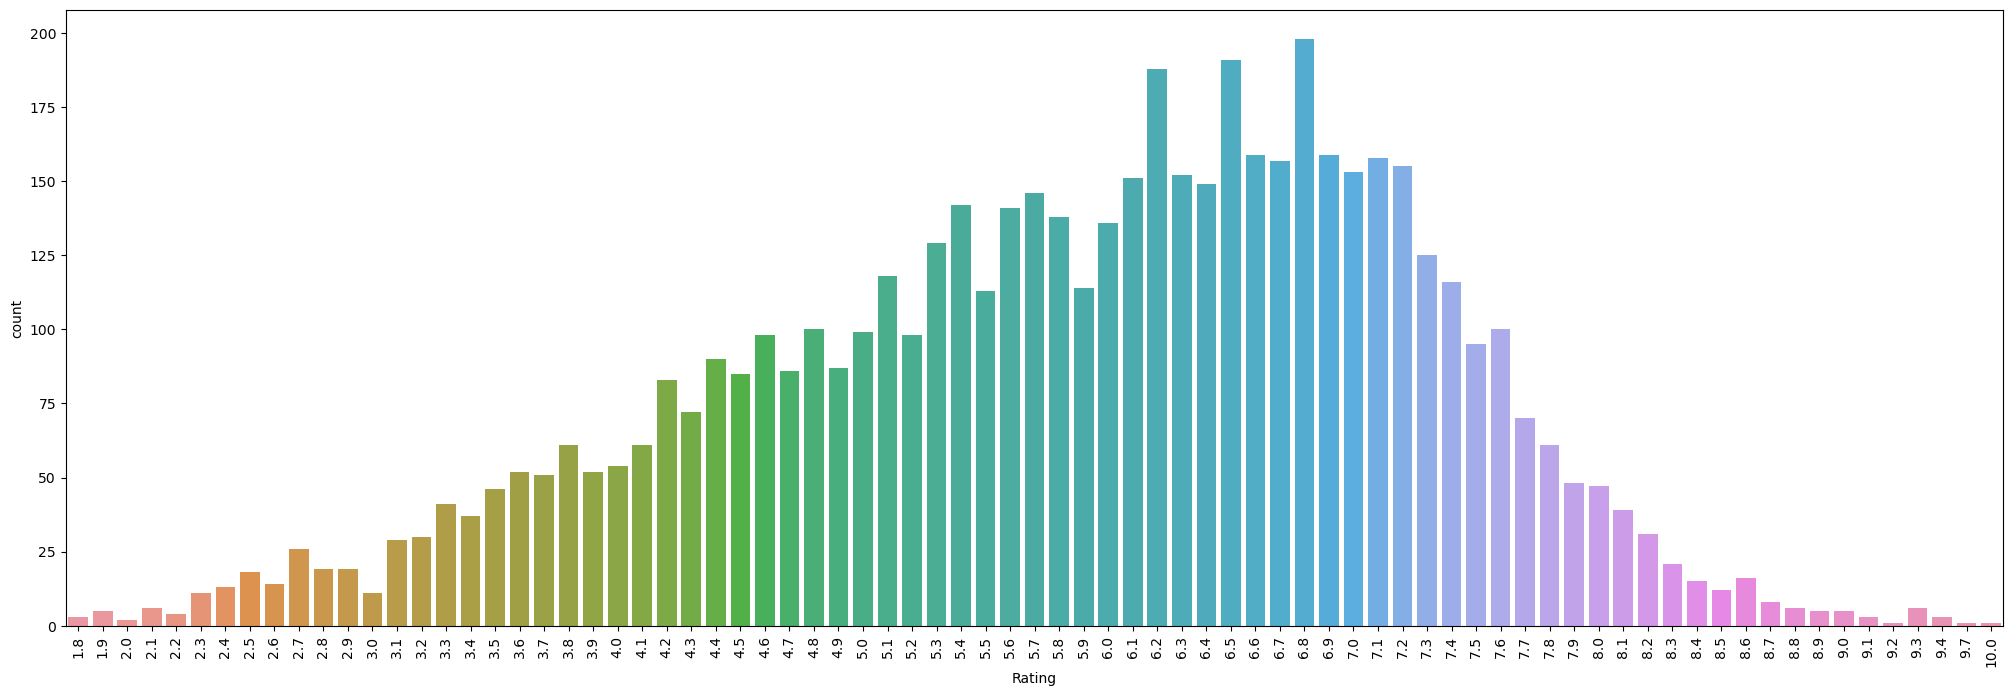

In [23]:
plt.figure(figsize=(25,8))
sns.countplot(data=df,x='Rating')
plt.xlabel('Rating')
plt.xticks(rotation=90)
plt.show()

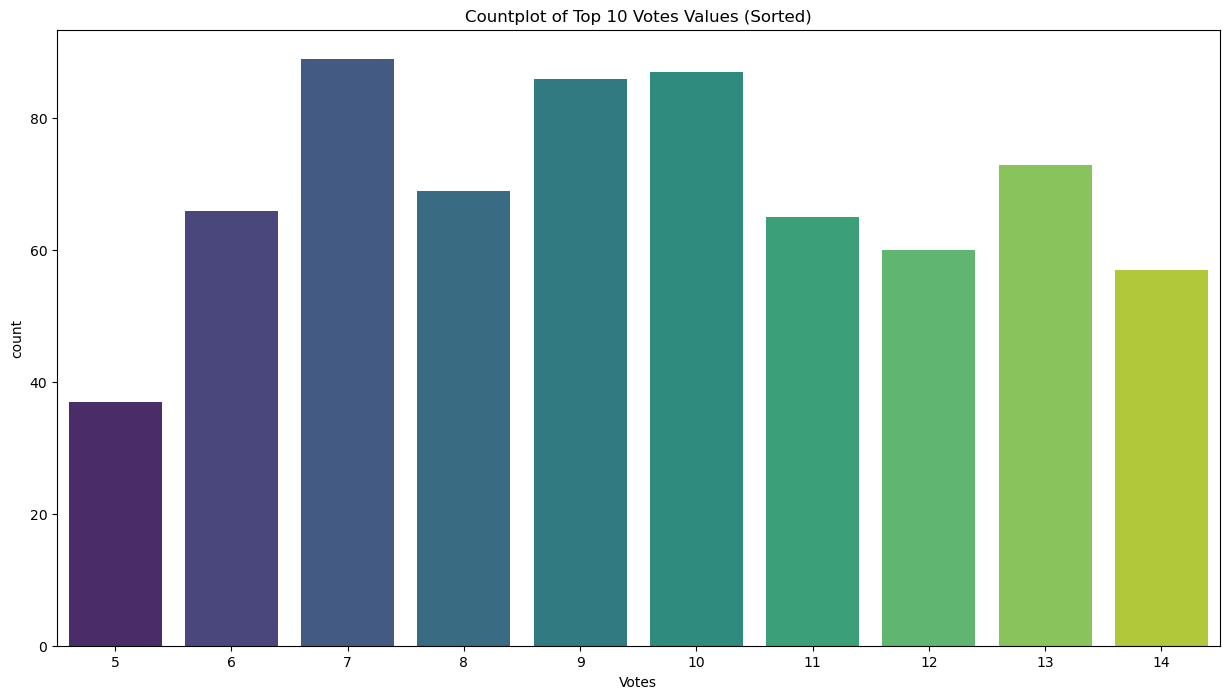

In [24]:
unique_votes = sorted(df['Votes'].unique())

# Take the top 10 values (since they are sorted, these will be the smallest 10)
top_votes = unique_votes[:10]

# Filter the DataFrame to include only rows with these top 10 'Votes' values
filtered_df = df[df['Votes'].isin(top_votes)]

# Plot the countplot for the filtered values
plt.figure(figsize=(15, 8))
sns.countplot(data=filtered_df, x='Votes', order=top_votes,palette='viridis')
plt.xlabel('Votes')
plt.title('Countplot of Top 10 Votes Values (Sorted)')
plt.show()

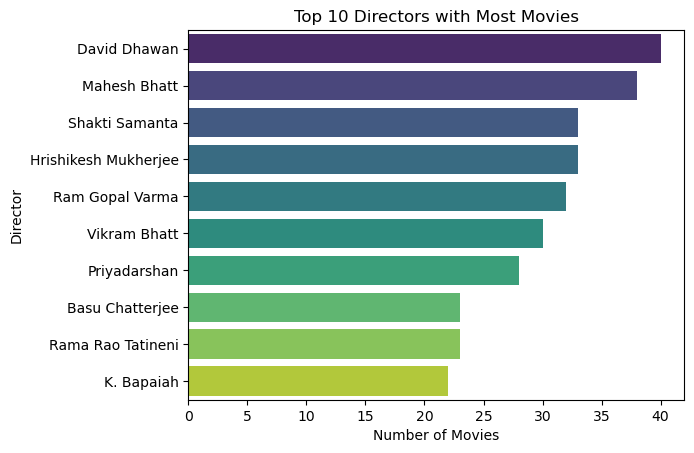

In [25]:
directors_with_most_movies=df['Director'].value_counts()[:10]
sns.barplot(x=directors_with_most_movies.values, y=directors_with_most_movies.index, palette='viridis')
plt.title('Top 10 Directors with Most Movies')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.show()

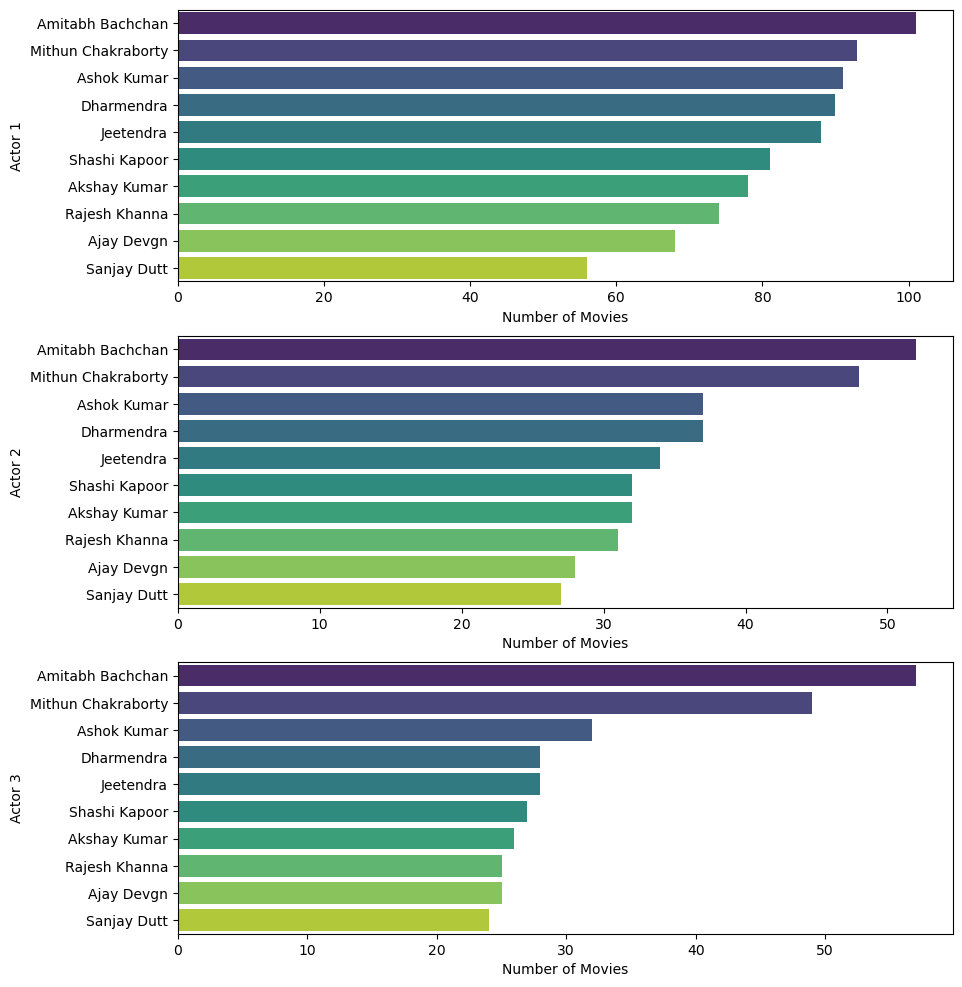

In [26]:
fig,axs=plt.subplots(3,1,figsize=(10,12))


actor1=df['Actor 1'].value_counts()[:10]
sns.barplot(x=actor1.values,y=actor1.index,palette='viridis',ax=axs[0])
axs[0].set_xlabel('Number of Movies')
axs[0].set_ylabel('Actor 1')

actor2=df['Actor 2'].value_counts()[:10]
sns.barplot(x=actor2.values,y=actor1.index,palette='viridis',ax=axs[1])
axs[1].set_xlabel('Number of Movies')
axs[1].set_ylabel('Actor 2')

actor3=df['Actor 3'].value_counts()[:10]
sns.barplot(x=actor3.values,y=actor1.index,palette='viridis',ax=axs[2])
axs[2].set_xlabel('Number of Movies')
axs[2].set_ylabel('Actor 3')

plt.show()

# Bivariant Analysis

Text(0.5, 1.0, 'Top 5 Directors with avg Rating mean')

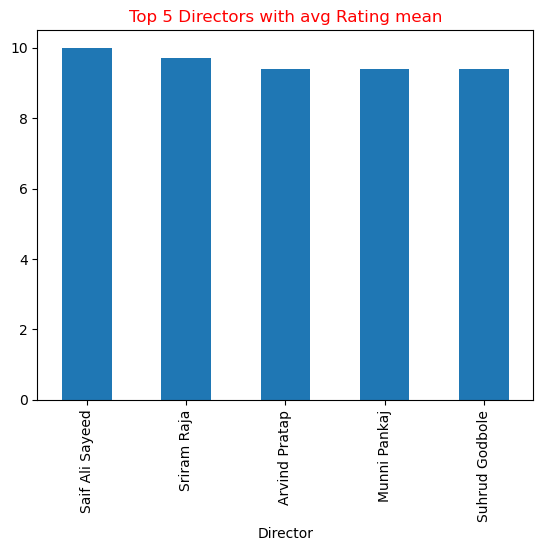

In [27]:
df.groupby(['Director'])['Rating'].mean().sort_values(ascending=False)[:5].plot(kind='bar')
plt.title("Top 5 Directors with avg Rating mean",c='r')

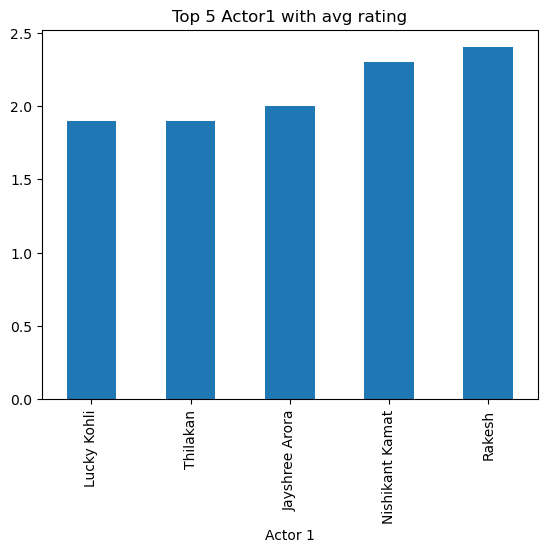

In [28]:
df.groupby(['Actor 1'])['Rating'].mean().sort_values()[:5].plot(kind='bar')
plt.title("Top 5 Actor1 with avg rating")
plt.show()

# EDA

In [29]:
X=df.drop('Rating',axis=1)
y=df['Rating']

In [30]:
!pip install category_encoders

Defaulting to user installation because normal site-packages is not writeable


In [31]:
import category_encoders as ce

In [32]:
encoder=ce.JamesSteinEncoder(return_df=True)

In [33]:
encoder.fit(X,y)
X=encoder.transform(X.loc[:,:])

In [34]:
from sklearn.preprocessing import RobustScaler
rs=RobustScaler()
X.loc[:,:]=rs.fit_transform(X.loc[:,:])

In [35]:
X

,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
0,0.580645,-0.838710,0.625432,-0.141657,1.049219,1.058406,1.166050,1.244936
1,0.580645,-0.806452,-0.167663,-0.109244,-1.479828,-0.378927,-1.662776,-1.689504
2,-0.129032,0.387097,0.314369,0.841537,-0.322090,-0.791165,-0.167134,-0.047758
3,0.129032,0.225806,1.044062,1.152461,1.217981,-0.314818,0.842252,0.321273
4,0.354839,-1.709677,-0.338811,0.240096,-0.312576,-0.377173,-0.048072,-0.368572
...,...,...,...,...,...,...,...,...
5652,0.451613,-0.645161,0.625432,0.338535,0.173780,0.238283,0.186841,-0.077927
5653,0.000000,0.580645,1.382402,1.644658,1.018398,-0.788231,-0.091508,-0.150192
5654,-0.387097,-0.322581,-0.148515,-0.098439,0.274402,0.335256,-0.139562,0.111157
5655,-0.064516,-0.193548,-0.398076,0.635054,-0.530949,-0.398058,-1.105747,-0.133931


In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [37]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(4436, 8) (1109, 8) (4436,) (1109,)


In [38]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [39]:
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

In [40]:
knr=KNeighborsRegressor()
svr=SVR()
gbr=GradientBoostingRegressor()
abr=AdaBoostRegressor()
rfr=RandomForestRegressor()
dtr=DecisionTreeRegressor()
en=ElasticNet(alpha=1.0,l1_ratio=0.5)
lassoR=Lasso(alpha=1.0)
lr=LinearRegression()
rr=Ridge(alpha=1.0)
xgbr=xgb.XGBRegressor(objective='reg:squarederror')

L=[knr,svr,gbr,abr,rfr,dtr,en,lassoR,lr,rr,xgbr]

In [41]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [42]:
def applymodel(model):
    model.fit(X_train,y_train)
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    print(model)
    print('-'*10)
    print("This is for the Train data")
    print("r2_score : ",r2_score(y_train,y_train_pred))
    print("mean_absolute_error : ",mean_absolute_error(y_train,y_train_pred))
    print("mean_squared_error : ",mean_squared_error(y_train,y_train_pred))
    print("-"*10)
    print("This is for the Test data")
    print("r2_score : ",r2_score(y_test,y_test_pred))
    print("mean_absolute_error : ",mean_absolute_error(y_test,y_test_pred))
    print("mean_squared_error : ",mean_squared_error(y_test,y_test_pred))
    print()
    print()

In [43]:
for i in L:
    applymodel(i)

KNeighborsRegressor()
----------
This is for the Train data
r2_score :  0.8656233061483769
mean_absolute_error :  0.3425924256086564
mean_squared_error :  0.24973282236248875
----------
This is for the Test data
r2_score :  0.7972466629257
mean_absolute_error :  0.4182506762849414
mean_squared_error :  0.36907051397655544


SVR()
----------
This is for the Train data
r2_score :  0.8271842861480223
mean_absolute_error :  0.3913299402891191
mean_squared_error :  0.32116994942959987
----------
This is for the Test data
r2_score :  0.8130838529758131
mean_absolute_error :  0.40678165833605306
mean_squared_error :  0.3402421851505905


GradientBoostingRegressor()
----------
This is for the Train data
r2_score :  0.869907937059918
mean_absolute_error :  0.34639203211627073
mean_squared_error :  0.2417700355156697
----------
This is for the Test data
r2_score :  0.831203300009629
mean_absolute_error :  0.3930805298605197
mean_squared_error :  0.30725947953282395


AdaBoostRegressor()
--------

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
param_grid = {
    'n_estimators': [100, 200, 300],      
    'learning_rate': [0.05, 0.1, 0.2],    
    'max_depth': [3, 4, 5],               
    'colsample_bytree': [0.7, 0.8, 0.9],  
    'gamma': [0, 0.1, 0.2]         
}

In [46]:
gsc=GridSearchCV(estimator=xgbr,param_grid=param_grid,cv=5,n_jobs=-1)

In [47]:
gsc.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8, 0.9],
                         'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]})

In [48]:
print("Best parameters : ",gsc.best_params_)
print("Best score : ",gsc.best_score_)

Best parameters :  {'colsample_bytree': 0.9, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Best score :  0.8531613354127089


In [49]:
final_model=gsc.best_estimator_

In [50]:
final_pred=final_model.predict(X_test)

In [51]:
print("r2_score of final_model : ",r2_score(y_test,final_pred))

r2_score of final_model :  0.8536517610274563


In [52]:
X.head()

,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
0,0.580645,-0.838710,0.625432,-0.141657,1.049219,1.058406,1.166050,1.244936
1,0.580645,-0.806452,-0.167663,-0.109244,-1.479828,-0.378927,-1.662776,-1.689504
2,-0.129032,0.387097,0.314369,0.841537,-0.322090,-0.791165,-0.167134,-0.047758
3,0.129032,0.225806,1.044062,1.152461,1.217981,-0.314818,0.842252,0.321273
4,0.354839,-1.709677,-0.338811,0.240096,-0.312576,-0.377173,-0.048072,-0.368572


In [53]:
df.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,2019,109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
1,2019,110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
2,1997,147.0,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
3,2005,142.0,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
4,2012,82.0,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [54]:
sample_X=pd.DataFrame({'Year':[2011],'Duration':[132],'Genre':['Horror,Thriller'],'Votes':[42],'Director':['Rahul Rawail'],'Actor 1':['Prateik'],'Actor 2':['Muntazir Ahmed'],'Actor 3':['Kiran Bhatia']})

In [55]:
sample_X_encoded = encoder.transform(sample_X)

In [56]:
sample_X_encoded = rs.fit_transform(sample_X_encoded)

In [58]:
final_model.predict(sample_X_encoded)[0]

5.747792

# Exporting the model via pkl

In [57]:
import pickle
with open('movie_model.pkl','wb') as f:
    pickle.dump(final_model,f)

In [58]:
with open('movie_encoder.pkl','wb') as k:
    pickle.dump(encoder,k)